<a href="https://colab.research.google.com/github/Saksham0905/dataanalytics/blob/main/NYdataclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/AB_NYC_2019.csv")
print(" Dataset shape:", df.shape)
df.head()


 Dataset shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:

df.info()

df.describe(include='all')


duplicates = df.duplicated().sum()
print(f" Duplicates found: {duplicates}")


<class 'pandas.core.frame.DataFrame'>
Index: 38714 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38714 non-null  int64         
 1   name                            38714 non-null  object        
 2   host_id                         38714 non-null  int64         
 3   host_name                       38714 non-null  object        
 4   neighbourhood_group             38714 non-null  object        
 5   neighbourhood                   38714 non-null  object        
 6   latitude                        38714 non-null  float64       
 7   longitude                       38714 non-null  float64       
 8   room_type                       38714 non-null  object        
 9   price                           38714 non-null  int64         
 10  minimum_nights                  38714 non-null  int64         
 11  number_

In [ ]:
df = df.drop_duplicates()
print(" Duplicates removed. New shape:", df.shape)


 Duplicates removed. New shape: (38714, 16)


In [ ]:

print("\n Missing values per column:")
print(df.isnull().sum())

df = df.dropna(subset=['name', 'host_name'])

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


df = df.dropna(subset=['last_review'])



 Missing values per column:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])


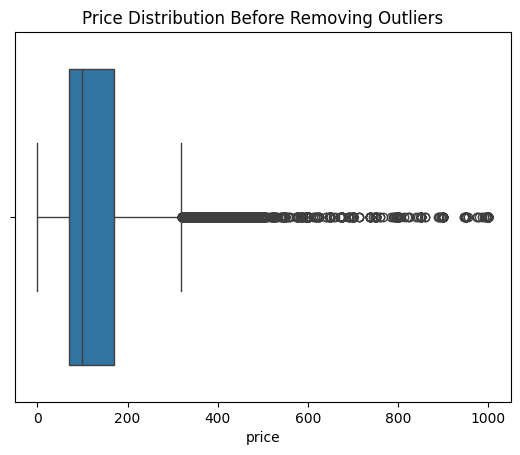

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x=df['price'])
plt.title("Price Distribution Before Removing Outliers")
plt.show()


df = df[df['price'] <= 1000]


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
print(" Final Dataset Info:")
print(df.info())

print(" Unique neighborhoods:", df['neighbourhood_group'].nunique())
print(" Dataset cleaned and ready for analysis.")


 Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 38714 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38714 non-null  int64         
 1   name                            38714 non-null  object        
 2   host_id                         38714 non-null  int64         
 3   host_name                       38714 non-null  object        
 4   neighbourhood_group             38714 non-null  object        
 5   neighbourhood                   38714 non-null  object        
 6   latitude                        38714 non-null  float64       
 7   longitude                       38714 non-null  float64       
 8   room_type                       38714 non-null  object        
 9   price                           38714 non-null  int64         
 10  minimum_nights                  38714 non-null  int64 